# Project: Analyzing The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul><li><a href="#cleaning">Data Cleaning</a></li></ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
      <ul><a href="#features">1. What features are interesting to a movie fanatic?</a></ul>
      <ul><a href="#correlations">2. How does certain variables affect one another?</a></ul>
<li><a href="#conclusions">Conclusions</a></li>
    <ul><li><a href="#limitations">Limitations</a></li></ul>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, I will be analyzing data using associated with the 10,000+ movies collected from The Movie Database (TMDb) from 1960-2015. I chose to analye this dataset as I feel this topic interest me the most. The key research questions include: 1. What features are interesting to a movie fanatic? 1.1 What are top 5 movies that had the hightest budget adjusted? 1.2 What are top 5 movies with the longest runtime? 1.3 Which is the most popular genre? 2. How does certain variables affect one another? 2.1 Is there any impact of vote count on revenue? 2.2 Do higher budget movies always generate big revenue? 2.3 Is there a strong correlation between popularity and the vote average?

In [1]:
# To analyze the data, I will need to import the packages below.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I loaded in the data, checked for cleanliness, and then trimmed and cleaned my dataset for analysis. First, I read the tmdb_m file. Next, I check the dataframe of shape for rows and columns. Follow by, I checked .describe() to get the statistical data for the dataset. Then, I got the summary of the dataframe by using info().

### General Properties

In [2]:
# To read the tmdb_m file.
tmdb_m = pd.read_csv('tmdb-movies.csv')
tmdb_m.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#To check the shape of the dataframe, specifically the rows and columns.
tmdb_m.shape

(10866, 21)

In [4]:
#To find low unique values use .describe (). Multiple values are 0, may need to clean the 0 values.
tmdb_m.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#To see the summary of the dataframe.
tmdb_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='cleaning'></a>
### Data Cleaning (To clean the data by modifying, replacing, or removing data to ensure that the dataset is of the highest quality and as well-structured)
>In this section of the report, I dropped columns that I will not be using, duplicates, filled NA/NaN values by setting (0, inplace = True) for strings, replaced the (0, np.NAN, inplace=True), and dropped values missing values for . In addition, I have included overview of the dataframe of the summary statistics using histograms after data cleaning.

In [6]:
# Drop columns that I am not planning to use.
tmdb_m.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'director', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'release_year'], axis=1, inplace=True)

In [7]:
#Drop duplicates.
tmdb_m.drop_duplicates(inplace=True)

In [8]:
#Check to make sure columns are dropped.
tmdb_m.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [9]:
#To check for missing values in the dataset specifically for strings.
tmdb_m.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
#To replace Null values for strings.
tmdb_m.fillna(0, inplace = True)

In [11]:
#Check to make sure they are 0.
tmdb_m.isnull().sum()

popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
budget_adj        0
revenue_adj       0
dtype: int64

In [12]:
#To replace and drop the missing values.
tmdb_m['budget_adj'].replace(0, np.NAN, inplace=True)
tmdb_m['revenue_adj'].replace(0, np.NAN, inplace=True)
tmdb_m['runtime'].replace(0, np.NAN, inplace=True)

tmdb_m.dropna(axis=0, inplace=True)

In [13]:
#Check to make sure the 0 values are gone.
tmdb_m.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


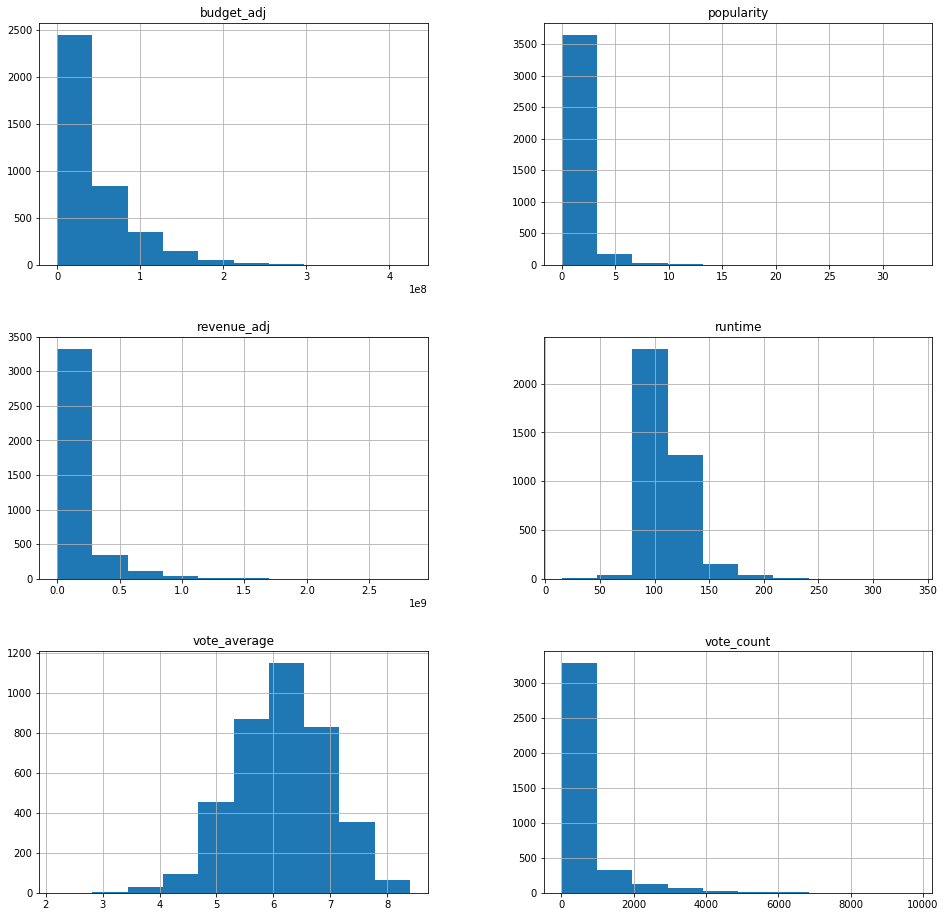

In [14]:
#Overview of summary statistics per histograms of the dataframe after cleaning the data.
tmdb_m.hist(figsize=(16,16));

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I have examined the data by creating barplots, scatterplots, and histograms in order to answer the reseach questions.
<a id='features'></a>
### 1. What features are interesting to a movie fanatic?

#### 1.1 What are top 5 movies that had the hightest adjusted budget?

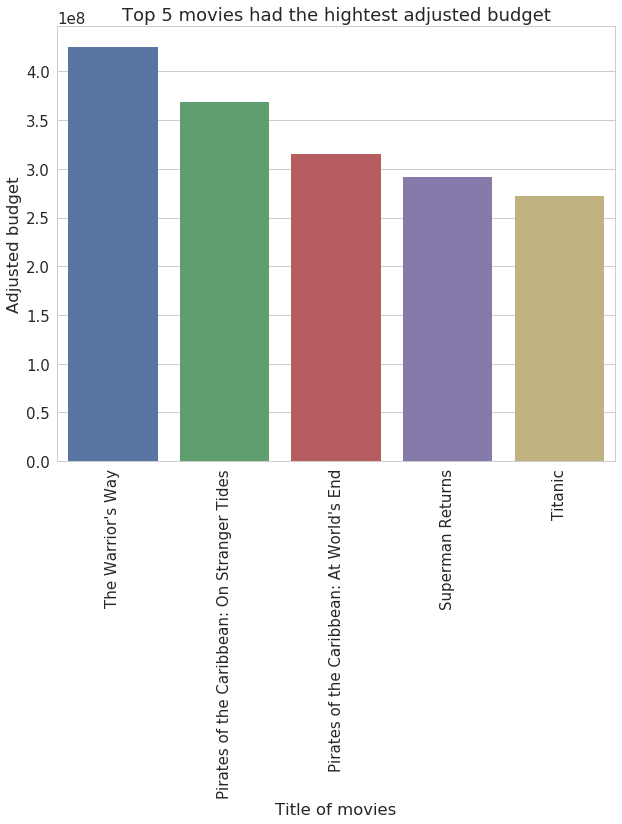

In [15]:
#This barplot is to show the top 5 movies had the hightest budget adjusted.
m_with_budg = tmdb_m[['original_title','budget_adj']]

sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid", font_scale=1.5)
#Set limit to 5 as there aren't enough space to plot all the movies in one barplot.
axis = sns.barplot(
    m_with_budg.sort_values(by = "budget_adj", ascending=False).head(5).original_title, 
    m_with_budg.sort_values(by = "budget_adj", ascending=False).head(5).budget_adj)

#Rotation of the x-ticks.
plt.xticks(rotation=90)

#Labels and title.
axis.set(xlabel='Title of movies', ylabel='Adjusted budget', title = 'Top 5 movies had the hightest adjusted budget')
plt.show()

#### 1.2 What are top 5 movies with the longest runtime?

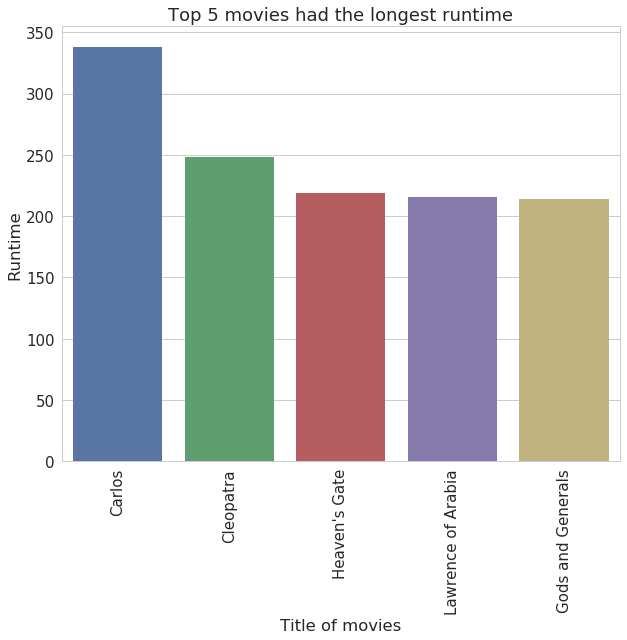

In [16]:
#This barplot is to show the top 5 movies wuth the longest runtime.
m_with_rt = tmdb_m[['original_title','runtime']]

sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid", font_scale=1.5)
#Set limit to 5 as there aren't enough space to plot all the movies in one barplot.
axis = sns.barplot(
    m_with_rt.sort_values(by = "runtime", ascending=False).head(5).original_title, 
    m_with_rt.sort_values(by = "runtime", ascending=False).head(5).runtime)

#Rotation of the x-axis Titles of movies.
plt.xticks(rotation=90)

#Set labels and title.   
axis.set(xlabel='Title of movies', ylabel='Runtime', title = 'Top 5 movies had the longest runtime')
plt.show()

#### 1.3 Which is the most popular genre?

In [17]:
#This is to split the genres as they need to be separated.
tmdb_m['genres']=tmdb_m['genres'].str.split("|",expand=True)
tmdb_m['genres'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

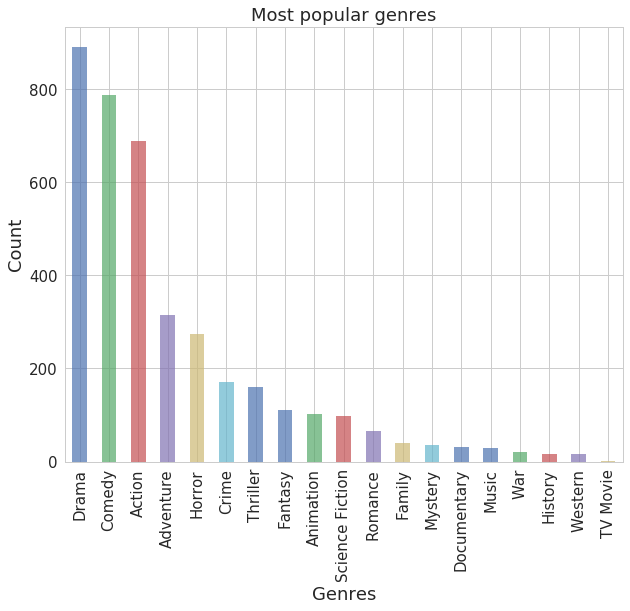

In [18]:
#This bar graph shows the most popular genres after splitting the genres individually. No need to set limit.
tmdb_m['genres'].value_counts().plot(kind='bar',alpha=0.7)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Most popular genres')
plt.show()

<a id='correlations'></a>
### 2. How does certain variables affect one another?

#### 2.1 Is there any impact of vote count on revenue?

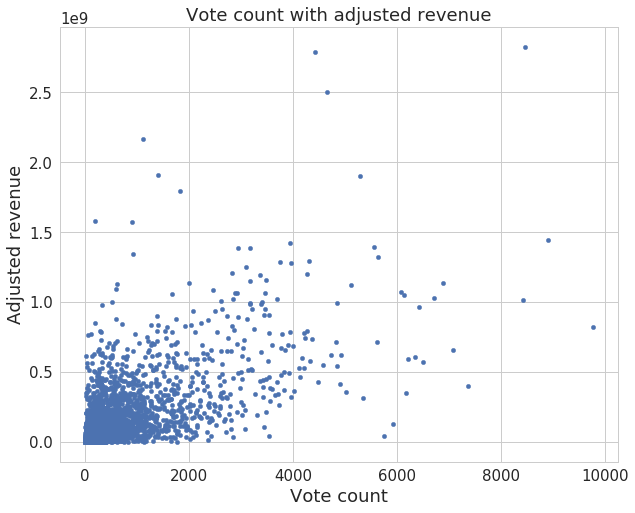

In [19]:
#This is a scatterplot to show the correlation of vote count and adjusted revenues.
tmdb_vote_c = tmdb_m.loc[:, 'vote_count' : 'revenue_adj']
tmdb_vote_c.plot(x='vote_count', y='revenue_adj', kind='scatter', title="Vote count with adjusted revenue")
plt.xlabel('Vote count',fontsize=18)
plt.ylabel('Adjusted revenue',fontsize=18);

In [20]:
#To show the correlation coefficient and covert in two decimal points.
tmdb_vote_c[['vote_count','revenue_adj']].corr().round(2)

,vote_count,revenue_adj
vote_count,1.00,0.65
revenue_adj,0.65,1.00


#### 2.2 Do higher budget movies always generate big revenue?

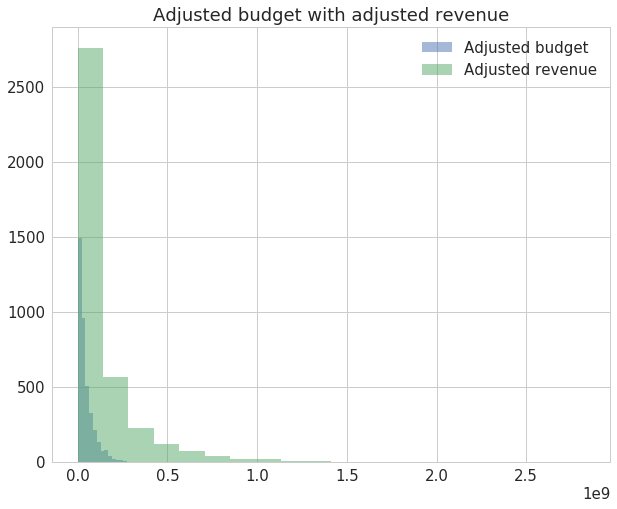

In [21]:
#This is a histogram to show the correlation of adjusted budget and revenues.
tmdb_m['budget_adj'].hist(alpha=0.5, bins=20, label='Adjusted budget')
tmdb_m['revenue_adj'].hist(alpha=0.5, bins=20, label='Adjusted revenue')
plt.legend()
plt.title ('Adjusted budget with adjusted revenue');

In [22]:
#To show the correlation coefficient and covert in two decimal points.
tmdb_m[['budget_adj','revenue_adj']].corr().round(2)

,budget_adj,revenue_adj
budget_adj,1.00,0.57
revenue_adj,0.57,1.00


#### 2.3 Is there a strong correlation between popularity and the vote average?

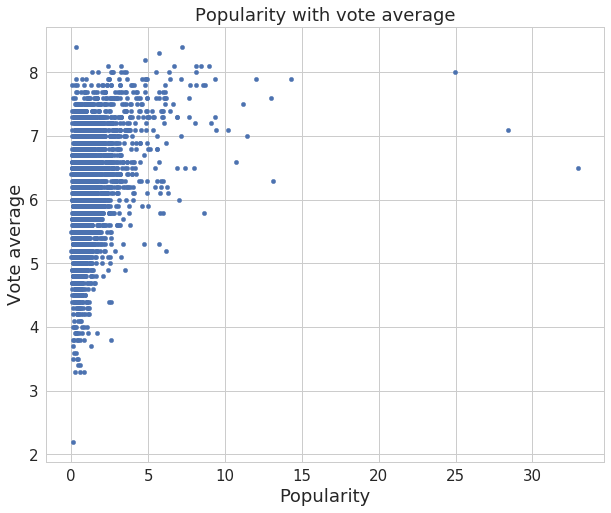

In [23]:
#This is a scatterplot to show the correlation of vote count and adjusted revenues.
tmdb_vote_avg = tmdb_m.loc[:, 'popularity' : 'vote_average']
tmdb_vote_avg.plot(x='popularity', y='vote_average', kind='scatter', title="Popularity with vote average")
plt.xlabel('Popularity',fontsize=18)
plt.ylabel('Vote average',fontsize=18);

In [24]:
#To show the correlation coefficient and covert in two decimal points.
tmdb_vote_avg[['popularity','vote_average']].corr().round(2)

,popularity,vote_average
popularity,1.00,0.32
vote_average,0.32,1.00


<a id='conclusions'></a>
## Conclusions

> There many features that interest a movie fanatic in the dataset. The top 5 movies had the hightest adjusted budget in descending order are "The Warrior's Way", "Pirates of the Caribbean: On Stranger Tides", "Pirates of the Caribbean: At Word's End", "Superman Returns", and "Titanic". The 5 movies had the longest runtime in descending order are "Carlos", "Cleopatra", "Heaven's Gate", "Lawrence of Arabia", and "Gods and Generals". The most popular genre is drama. There is a moderate correlation between vote count and adjusted revenue because the correlation coefficient is 0.65. Adjusted budget and adjusted revenue also have a a moderate correlation with a 0.57 correlation coefficient. Popularity and vote average seem to have a weak correlation with a correlation coefficient of 0.32. Certain variables do have some correlation more or less, but that doesn't mean it implies causation. This dataset have a lot of interesting features the would pique the interest anyone who love watching movies. However, there are some limitations.
<a id='limitations'></a>
### Limitations
>1. Replacing and dropping missing values both strings (genres) and numeric values (budget_adj, revenue_adj, and runtime) could cause some bias with the data.
>2. The dataset is up to the year of 2015 which doesn't include most recent movies at least from 2016-2020 (now).
>3. The units of measure for adjusted budget and revenue are unknown, some of the movies may not be in U.S. million dollars.
>4. The units of measure for popularity and vote average are also unknown.

<a id='sources'></a>
## Sources
 - Numpy Documentation: https://numpy.org/doc/stable/
 - Pandas Documentation: https://pandas.pydata.org/docs/
 - Matplotlib Documentation: https://matplotlib.org/contents.html
 - Seaborn: https://seaborn.pydata.org/

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0